In [ ]:
#importamos las librerias que necesitamos
import pandas as pd
import datetime
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
#cargamos el archivo xlsx este archivo debe subirse a la carpeta de archivos del colabority o estar en la misma carpeta del archivo .ipynb
Archivo = "Datosventas_1.xlsx"
Datosventas= pd.read_excel(Archivo) #lee el archivo xlsx  y se crea un dataframe crea un tabla
Datosventas

,Mes,Código_Material,Venta_Neta_Kilos,Venta_Neta_ME
0,2020.01,1003831,960.0,21627777
1,2020.01,1003856,1705.0,21018304
2,2020.01,1003861,5510.0,55756328
3,2020.01,1003863,2900.0,36490870
4,2020.01,1003865,10790.0,119309535
...,...,...,...,...
2706,2022.02,3002507,7500.0,75990000
2707,2022.02,3014380,2400.0,32583600
2708,2022.02,3017624,3100.0,33031500
2709,2022.02,3019452,86088.0,585439020


In [ ]:
# la funcion datos_train_modelo estrcutura los datos que van hacer utilizados en el entrenameminto de la regrecion lineal
#esta funcion retorna un X que es un arreglo matricial que contien las dos varibles de entra el mes y las ventas de un codigo,
#esto en toda la secuencia de tiempo de los datos
def datos_train_modelo(prueba):
  prueba=prueba.replace(np.nan,"0")
  set_entrenamiento=prueba[['Mes','Venta_Neta_ME']]
  set_validacion=prueba[['Venta_Neta_Kilos']]
  #generamos la varibles que utilizaremos de entrada
  variableM=set_entrenamiento['Mes'].values #variableM sera los mes
  variableV=set_entrenamiento['Venta_Neta_ME'].values #variableV sera las ventas
  #generar la varible que se tomara par ala salida del sistema
  variableY=set_validacion['Venta_Neta_Kilos'].values #variableY las ventas por kilos
  X=np.array([variableM,variableV]).T
  Y=np.array(variableY)
  return X,Y

In [ ]:
#esta funcion recibe un data set que contiene los valoes del codigo en el mes de febrero del 2022
#con esto estructura las vvaribles de entra que se utilizan para el entrenamoento
#aunque devuleve dos colas solo X_prueba es utilizada para la prediccion, Y_prueba solo es utilizada con fines de validacion
def datos_test_modelo(test):
  #generamos la varibles que utilizaremos de entrada
  M=test['Mes'].values #M sera los mes
  V=test['Venta_Neta_ME'].values #V sera las ventas
  #generar la varible que se tomara par ala salida del sistema
  Y=test['Venta_Neta_Kilos'].values #Y las ventas por kilos
  #se crea el modelo y se crean los array que va hacer el parametro de entrada y el de salida
  X_prueba=np.array([M,V]).T
  Y_prueba=np.array(Y)
  return X_prueba,Y_prueba

In [ ]:
# esta funcion contine el modelo de regrecion lineal que recivira en cada caso datos de netrenamiento y validacion
#de un codigo en especifico con los cuales se entrenara y luego devulve una prediccion
def modelo(X,Y,X_prueba):
  regresion=LinearRegression()
  regresion=regresion.fit(X,Y)
  y_pred=regresion.predict(X)
  error=np.sqrt(mean_squared_error(Y,y_pred))
  r2=regresion.score(X,Y)
  predic=regresion.predict(X_prueba)
  return predic

In [ ]:
#por algunas observaciones anteriores identificamos qie el mes de novienbre del 2021 era el mes que mas
#codigos de materia diferente tenia
#estos codigos se usaran para extraer los datos de entrenamiento y validacion
df=Datosventas[(Datosventas.Mes==2021.11)]
print(len(df))

114


In [ ]:
Resultados=[] #contiene los resultados tanto al cofigo como el valor real y su respectiva prediccion
for i in df.index:
  resultado=[]
  cod=df['Código_Material'][i]                               #codigo de material
  pruebas=Datosventas[(Datosventas.Código_Material==cod)]    #dataser contiene todas las lines que tiene como codigo de materia a cod
  inferencia=pruebas[(pruebas.Mes == 2022.02)]               #la fila de cod que contiene a febrero de 2022
  pruebas=pruebas[(pruebas.Mes != 2022.02)]                  #dataset que se usara para entrenar
  X,Y=datos_train_modelo(pruebas)                            #se llama a la funcion que estructura los datos de entrenamiento
  X_prueba,Y_prueba=datos_test_modelo(inferencia)            #llamado a funcion que estructura los datos de prueba
  try:                                                       #condicional que nos indica si algun codigo de material no esta en el registro del 2022.02
    predic=modelo(X,Y,X_prueba)                              #llamada al modelo envia datos de entrenamiento y datos a inferir
    resultado.append(cod)                                    
    resultado.append(int(Y_prueba))
    resultado.append(int(predic))
    Resultados.append(resultado)                            #se agrega el areglo con los recultados
  except:                                                   #si el codigo no aparece tanto el valore real como la prediccion seran cero
    resultado.append(cod)
    resultado.append(0)
    resultado.append(0)
    Resultados.append(resultado)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
Prediccion=[]
for i in range(0,len(Resultados)):
  Prediccion.append([Resultados[i][1]])

In [ ]:
print(len(Prediccion))

114


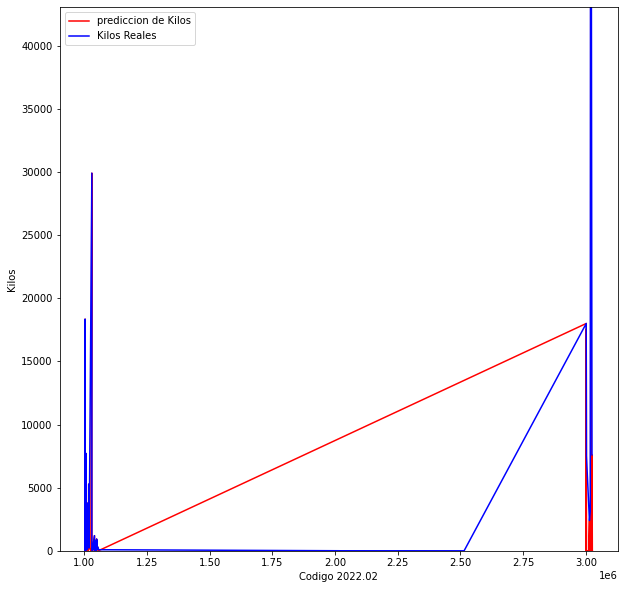

In [ ]:
#Grafica de comparacion valor real y prediccion
x=Datosventas[(Datosventas.Mes == 2022.02)]
x1=Datosventas[(Datosventas.Mes == 2021.11)]
x_in=x1['Código_Material']
y_in=x['Venta_Neta_Kilos']
plt.figure(figsize=(10,10))
plt.plot(x_in,Prediccion,color='red', label='prediccion de Kilos')
plt.plot(x['Código_Material'],y_in,color='blue', label='Kilos Reales')
plt.ylim(0, 0.5 * np.max(Prediccion))
plt.xlabel('Codigo 2022.02')
plt.ylabel('Kilos')
plt.legend()
plt.show()

In [ ]:
print(len(x))

94


In [ ]:
#Crear dataset con el valore real y la prediccion de los kilos
Prediccion=pd.DataFrame(Resultados)
Prediccion.rename(columns={0:'Codigo_Material',1:'Real_Kilos',2:'Prediccion_Kilos'}, inplace=True)
Prediccion

,Codigo_Matwrial,Real_Kilos,Prediccion_Kilos
0,1003831,0,0
1,1003861,3160,2900
2,1003863,1165,1015
3,1003865,5025,4229
4,1003866,2275,2145
...,...,...,...
109,3021522,0,0
110,3024247,0,0
111,3024585,7600,6879
112,3025931,0,0


In [ ]:
#guardamos las predicciones en un archivo xlsx
Prediccion.to_excel('Prediccion_kilos_Febrero_2022.xlsx',index=False)